<a href="https://colab.research.google.com/github/ctalamilla/Austral-NLP-Final/blob/main/Austral_Entrega_Final_NLP_Boletines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 51.7 MB/s eta 0:00:00


In [3]:
import fitz  # PyMuPDF
import re
import pandas as pd

# Ingesta de Datos de Boletines

In [4]:
import os
import requests

In [ ]:
# Instalar gdown para descargar desde Google Drive
!pip install -q gdown

# Descargar el archivo ZIP desde Google Drive (ID del archivo)
!gdown --id 1VsKDt8KTn7_n_6slX6vYEaOTkloS9UqP --output boletines.zip

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1VsKDt8KTn7_n_6slX6vYEaOTkloS9UqP
From (redirected): https://drive.google.com/uc?id=1VsKDt8KTn7_n_6slX6vYEaOTkloS9UqP&confirm=t&uuid=d6fd7ffe-b358-427d-a667-e4f936ba45fe
To: /content/boletines.zip
100% 750M/750M [00:14<00:00, 52.3MB/s]


In [5]:
# Descomprimir el archivo
import zipfile
import os

In [ ]:
zip_path = "boletines.zip"
extract_folder = "boletines_extraidos"

# Crear carpeta de salida si no existe
os.makedirs(extract_folder, exist_ok=True)

# Extraer los archivos
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Listar archivos extraídos
import os
archivos = os.listdir(extract_folder)
print("Archivos extraídos:")
for archivo in archivos:
    print(archivo)

Archivos extraídos:
Boletines


In [ ]:
import os

carpeta = "/content/boletines_extraidos/Boletines/boletines_2024" # aqui va la carpeta en drive donde estan los documentos

pdfs = [f for f in os.listdir(carpeta) if f.endswith(".pdf")]

print("PDFs encontrados:", pdfs)

PDFs encontrados: ['21632.pdf', '21711.pdf', '21796.pdf', '21739.pdf', '21760.pdf', '21773.pdf', '21686.pdf', '21788.pdf', '21786.pdf', '21748.pdf', '21731.pdf', '21832.pdf', '21627.pdf', '21622.pdf', '21783.pdf', '21805.pdf', '21822.pdf', '21809.pdf', '21776.pdf', '21623.pdf', '21725.pdf', '21723.pdf', '21778.pdf', '21702.pdf', '21742.pdf', '21706.pdf', '21842.pdf', '21738.pdf', '21673.pdf', '21655.pdf', '21800.pdf', '21696.pdf', '21640.pdf', '21657.pdf', '21635.pdf', '21793.pdf', '21743.pdf', '21849.pdf', '21806.pdf', '21794.pdf', '21781.pdf', '21766.pdf', '21855.pdf', '21709.pdf', '21641.pdf', '21732.pdf', '21636.pdf', '21701.pdf', '21643.pdf', '21779.pdf', '21758.pdf', '21684.pdf', '21730.pdf', '21653.pdf', '21848.pdf', '21648.pdf', '21645.pdf', '21837.pdf', '21829.pdf', '21704.pdf', '21630.pdf', '21771.pdf', '21744.pdf', '21757.pdf', '21628.pdf', '21707.pdf', '21634.pdf', '21811.pdf', '21807.pdf', '21852.pdf', '21675.pdf', '21791.pdf', '21755.pdf', '21693.pdf', '21680.pdf', '21804

Por cada pdf o boletin se realiza la lectura y separacion de documentos.

In [ ]:
# --- 2. Procesar cada PDF ---
df_total = pd.DataFrame()

for numero in pdfs:
    pdf_path = os.path.join(carpeta, numero)
    if not os.path.exists(pdf_path):
        continue  # Saltar si no se descargó

    try:
        doc = fitz.open(pdf_path)
        texto_sumario = ""

        # Ignorar página 1 y 2
        # Ignorar página 0, 1 y la última página
        for i in range(2, len(doc) - 1):
            texto_sumario += doc[i].get_text()
        #for i in range(2, len(doc)):
        #    texto_sumario += doc[i].get_text()

        # Patrón que detecta bloques finalizados con OP
        patron_op = re.compile(r"OP\s*N[°º]:\s*[A-Z]*\d{6,}", re.IGNORECASE)
        matches = list(patron_op.finditer(texto_sumario))

        if not matches:
            documentos = [texto_sumario.strip()]
        else:
            documentos = []
            start_idx = 0
            for m in matches:
                end_idx = m.end()
                bloque = texto_sumario[start_idx:end_idx].strip()
                documentos.append(bloque)
                start_idx = end_idx
            if start_idx < len(texto_sumario):
                documentos.append(texto_sumario[start_idx:].strip())

        # Extraer OP
        def extraer_op_final(texto):
            match = re.search(r"OP\s*N[°º]:\s*([A-Z]*\d{6,})\s*$", texto.strip(), re.IGNORECASE)
            return match.group(1) if match else None

        df = pd.DataFrame({
            "Boletin_N": numero,
            "Documento_N": range(1, len(documentos)+1),
            "Texto": documentos
        })

        df["OP_Numero"] = df["Texto"].apply(extraer_op_final)
        df_total = pd.concat([df_total, df], ignore_index=True)
        print(f" Procesado boletín {numero} con {len(df)} documentos.")

    except Exception as e:
        print(f"Error procesando boletín {numero}: {e}")

 Procesado boletín 21632.pdf con 35 documentos.
 Procesado boletín 21711.pdf con 58 documentos.
 Procesado boletín 21796.pdf con 75 documentos.
 Procesado boletín 21739.pdf con 57 documentos.
 Procesado boletín 21760.pdf con 69 documentos.
 Procesado boletín 21773.pdf con 58 documentos.
 Procesado boletín 21686.pdf con 72 documentos.
 Procesado boletín 21788.pdf con 57 documentos.
 Procesado boletín 21786.pdf con 57 documentos.
 Procesado boletín 21748.pdf con 50 documentos.
 Procesado boletín 21731.pdf con 63 documentos.
 Procesado boletín 21832.pdf con 60 documentos.
 Procesado boletín 21627.pdf con 33 documentos.
 Procesado boletín 21622.pdf con 111 documentos.
 Procesado boletín 21783.pdf con 71 documentos.
 Procesado boletín 21805.pdf con 67 documentos.
 Procesado boletín 21822.pdf con 62 documentos.
 Procesado boletín 21809.pdf con 78 documentos.
 Procesado boletín 21776.pdf con 75 documentos.
 Procesado boletín 21623.pdf con 74 documentos.
 Procesado boletín 21725.pdf con 66 doc

In [ ]:
df_total

,Boletin_N,Documento_N,Texto,OP_Numero
0,21632.pdf,1,"Edición N° 21.632\nSalta, martes 16 de enero d...",SA100047418
1,21632.pdf,2,"SALTA, 11 de Enero de 2024\nDECRETO Nº 27\nMIN...",SA100047419
2,21632.pdf,3,"SALTA, 11 de Enero de 2024\nDECRETO Nº 28\nMIN...",SA100047420
3,21632.pdf,4,"SALTA, 11 de Enero de 2024\nDECRETO Nº 29\nMIN...",SA100047421
4,21632.pdf,5,"SALTA, 11 de Enero de 2024\nDECRETO Nº 30\nMIN...",SA100047422
...,...,...,...,...
15351,21644.pdf,50,CONSORCIO DE PROPIETARIOS SAN FRANCISCO III\nE...,100111279
15352,21644.pdf,51,"Pág. N° 42\nEdición N° 21.644\nSalta, jueves 1...",100111275
15353,21644.pdf,52,"AVISOS GENERALES\nSALTA, 25 de enero de 2024\n...",100111284
15354,21644.pdf,53,RECAUDACIÓN\nCASA CENTRAL\nSaldo anual acumula...,100111350


In [ ]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15356 entries, 0 to 15355
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Boletin_N    15356 non-null  object
 1   Documento_N  15356 non-null  int64 
 2   Texto        15356 non-null  object
 3   OP_Numero    15114 non-null  object
dtypes: int64(1), object(3)
memory usage: 480.0+ KB


# Limpiza de los datos

Existen documentos que no estan asociados a un OP_Numero, se trata de encabezados o finales de documentos.

In [ ]:
df_total[df_total["OP_Numero"].isna()]

,Boletin_N,Documento_N,Texto,OP_Numero
34,21632.pdf,35,"Pág. N° 46\nEdición N° 21.632\nSalta, martes 1...",None
92,21711.pdf,58,"Pág. N° 50\nEdición N° 21.711\nSalta, jueves 1...",None
167,21796.pdf,75,"Pág. N° 81\nEdición N° 21.796\nSalta, jueves 1...",None
224,21739.pdf,57,"Pág. N° 53\nEdición N° 21.739\nSalta, viernes ...",None
293,21760.pdf,69,"Pág. N° 74\nEdición N° 21.760\nSalta, martes 3...",None
...,...,...,...,...
15198,21740.pdf,82,"Pág. N° 67\nEdición N° 21.740\nSalta, lunes 1 ...",None
15256,21840.pdf,58,"Pág. N° 49\nEdición N° 21.840\nSalta, viernes ...",None
15286,21629.pdf,30,"Pág. N° 33\nEdición N° 21.629\nSalta, jueves 1...",None
15301,21639.pdf,15,"Pág. N° 18\nEdición N° 21.639\nSalta, jueves 2...",None


In [ ]:
df_total = df_total[df_total["OP_Numero"].notna()]

In [ ]:
df_total.reset_index(drop=True, inplace=True)

In [ ]:
df_total

,Boletin_N,Documento_N,Texto,OP_Numero
0,21632.pdf,1,"Edición N° 21.632\nSalta, martes 16 de enero d...",SA100047418
1,21632.pdf,2,"SALTA, 11 de Enero de 2024\nDECRETO Nº 27\nMIN...",SA100047419
2,21632.pdf,3,"SALTA, 11 de Enero de 2024\nDECRETO Nº 28\nMIN...",SA100047420
3,21632.pdf,4,"SALTA, 11 de Enero de 2024\nDECRETO Nº 29\nMIN...",SA100047421
4,21632.pdf,5,"SALTA, 11 de Enero de 2024\nDECRETO Nº 30\nMIN...",SA100047422
...,...,...,...,...
15109,21644.pdf,49,"Pág. N° 40\nEdición N° 21.644\nSalta, jueves 1...",100111283
15110,21644.pdf,50,CONSORCIO DE PROPIETARIOS SAN FRANCISCO III\nE...,100111279
15111,21644.pdf,51,"Pág. N° 42\nEdición N° 21.644\nSalta, jueves 1...",100111275
15112,21644.pdf,52,"AVISOS GENERALES\nSALTA, 25 de enero de 2024\n...",100111284


Algunos documentos tienen pie de pagina y encabezados dentro del documento.

In [ ]:
def eliminar_pies_pagina(texto):
    lineas = texto.splitlines()
    nuevas_lineas = []
    skip = 0

    for i, linea in enumerate(lineas):
        if skip > 0:
            skip -= 1
            continue
        if re.match(r"Pág\.\s*N°\s*\d+", linea.strip()):
            skip = 3  # saltar esta línea y las 3 siguientes
            continue
        nuevas_lineas.append(linea)

    return "\n".join(nuevas_lineas)



In [ ]:
# Aplicar limpieza
df_total["Texto_Limpio"] = df_total["Texto"].apply(eliminar_pies_pagina)

/tmp/ipython-input-16-1015657097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total["Texto_Limpio"] = df_total["Texto"].apply(eliminar_pies_pagina)


In [ ]:
df_total.sample(3)

,Boletin_N,Documento_N,Texto,OP_Numero,Texto_Limpio
10323,21652.pdf,4,"SALTA, 9 de Febrero de 2024\nDECRETO Nº 81\nMI...",SA100047636,"SALTA, 9 de Febrero de 2024\nDECRETO Nº 81\nMI..."
13676,21851.pdf,41,"La Dra. Eugenia Fernández de Ullivarri, Jueza ...",100120338,"La Dra. Eugenia Fernández de Ullivarri, Jueza ..."
6628,21665.pdf,18,"SALTA, 21 de febrero de 2024\nRESOLUCIÓN Nº 19...",100112015,"SALTA, 21 de febrero de 2024\nRESOLUCIÓN Nº 19..."


In [ ]:
df_total.loc[1]['Texto']

'SALTA, 11 de Enero de 2024\nDECRETO Nº 27\nMINISTERIO DE SEGURIDAD/Y JUSTICIA\nExpediente Nº 0140044-246733/2022.\nVISTO la solicitud de Retiro Voluntario presentada por el Suboficial Mayor de la \nPolicía de la Provincia de Salta, Armando Iván Calvo Grabosky; y,\nCONSIDERANDO:\nQue de conformidad a las constancias de autos, se encuentran acreditados los \nrequisitos exigidos para el pase a situación de retiro conforme lo establece el Acta \nComplementaria al Convenio de Transferencia del Sistema Provincial de Previsión Social, \nratificada mediante el Decreto Nacional Nº 301/2006 y Decreto Provincial Nº 134/2006, este \núltimo ratificado mediante la Ley Nº 8128, razón por la cual corresponde conceder el \nbeneficio invocado;\nQue la liquidación tendiente a la determinación del haber de retiro cuenta con el \nvisado positivo de la Administración Nacional de la Seguridad Social (ANSES) y de la \nResolución Nº 757/2023 del Ministerio de Seguridad y Justicia, debidamente notificada al \n

In [ ]:
df_total.loc[1]['Texto_Limpio']

'SALTA, 11 de Enero de 2024\nDECRETO Nº 27\nMINISTERIO DE SEGURIDAD/Y JUSTICIA\nExpediente Nº 0140044-246733/2022.\nVISTO la solicitud de Retiro Voluntario presentada por el Suboficial Mayor de la \nPolicía de la Provincia de Salta, Armando Iván Calvo Grabosky; y,\nCONSIDERANDO:\nQue de conformidad a las constancias de autos, se encuentran acreditados los \nrequisitos exigidos para el pase a situación de retiro conforme lo establece el Acta \nComplementaria al Convenio de Transferencia del Sistema Provincial de Previsión Social, \nratificada mediante el Decreto Nacional Nº 301/2006 y Decreto Provincial Nº 134/2006, este \núltimo ratificado mediante la Ley Nº 8128, razón por la cual corresponde conceder el \nbeneficio invocado;\nQue la liquidación tendiente a la determinación del haber de retiro cuenta con el \nvisado positivo de la Administración Nacional de la Seguridad Social (ANSES) y de la \nResolución Nº 757/2023 del Ministerio de Seguridad y Justicia, debidamente notificada al \n

# Modelo para predecir etiquetas


In [ ]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                       model="hackathon-pln-es/bertin-roberta-base-zeroshot-esnli")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/354 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/855k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/514k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.


## Texto de ejemplo del modelo

In [ ]:
classifier(
    "El autor se perfila, a los 50 años de su muerte, como uno de los grandes de su siglo",
    candidate_labels=["cultura", "sociedad", "economia", "salud", "deportes"],
    hypothesis_template="Esta oración es sobre {}."
)


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


{'sequence': 'El autor se perfila, a los 50 años de su muerte, como uno de los grandes de su siglo',
 'labels': ['cultura', 'economia', 'salud', 'sociedad', 'deportes'],
 'scores': [0.30353307723999023,
  0.23484517633914948,
  0.21517494320869446,
  0.12502112984657288,
  0.12142564356327057]}

In [ ]:
import pandas as pd
import numpy as np
from transformers import pipeline
import torch
from typing import List, Dict, Tuple
import warnings
warnings.filterwarnings('ignore')

## Clasificador de documentos

In [ ]:
class DocumentClassifier:
    """
    Clasificador automático de documentos usando BART-large-MNLI
    para clasificación zero-shot de boletines oficiales
    """

    def __init__(self, model_name: str = "facebook/bart-large-mnli"):
        """
        Inicializa el clasificador

        Args:
            model_name: Nombre del modelo de Hugging Face
        """
        print("Cargando modelo BART-large-MNLI...")
        self.classifier = pipeline(
            "zero-shot-classification",
            model=model_name,
            device=0 if torch.cuda.is_available() else -1  # GPU si está disponible
        )
        print("Modelo cargado exitosamente!")

        # Etiquetas para clasificación
        self.etiquetas_boletin = [
            "Leyes",
            "Decisiones Administrativas",
            "Resoluciones Delegadas",
            "Resoluciones Ministeriales",
            "Resoluciones (Secretaría de Obras Públicas)",
            "Licitaciones Públicas",
            "Adjudicaciones Simples",
            "Contrataciones Abreviadas",
            "Concesiones de Agua Pública",
            "Sentencias",
            "Sucesorios",
            "Edictos de Quiebras",
            "Concursos Civiles o Preventivos",
            "Edictos Judiciales",
            "Constituciones de Sociedad",
            "Asambleas Comerciales",
            "Asambleas Civiles",
            "Avisos Generales",
            "Recaudación"
        ]

    def preprocess_text(self, text: str, max_length: int = 512) -> str:
        """
        Preprocesa el texto para optimizar la clasificación

        Args:
            text: Texto a procesar
            max_length: Longitud máxima del texto

        Returns:
            Texto preprocesado
        """
        if not isinstance(text, str) or not text.strip():
            return ""

        # Limpiar texto básico
        text = text.strip()

        # Tomar principalmente el inicio del documento (más informativo)
        # y algo del final si es muy largo
        if len(text) > max_length:
            # Tomar primeros 400 caracteres y últimos 100
            text = text[:400] + "..." + text[-100:]

        return text

    def classify_single_document(self, text: str, threshold: float = 0.5) -> Dict:
        """
        Clasifica un solo documento

        Args:
            text: Texto del documento
            threshold: Umbral mínimo de confianza

        Returns:
            Diccionario con resultado de clasificación
        """
        # Preprocesar texto
        processed_text = self.preprocess_text(text)

        if not processed_text:
            return {
                'etiqueta_predicha': 'Sin clasificar',
                'confianza': 0.0,
                'top_3_etiquetas': [],
                'scores_completos': {}
            }

        try:
            # Realizar clasificación
            resultado = self.classifier(
                processed_text,
                self.etiquetas_boletin,
                multi_label=False
            )

            # Extraer resultados
            etiqueta_principal = resultado['labels'][0]
            confianza_principal = resultado['scores'][0]

            # Top 3 etiquetas con scores
            top_3 = [
                {
                    'etiqueta': resultado['labels'][i],
                    'score': resultado['scores'][i]
                }
                for i in range(min(3, len(resultado['labels'])))
            ]

            # Scores completos
            scores_completos = dict(zip(resultado['labels'], resultado['scores']))

            # Aplicar umbral de confianza
            if confianza_principal < threshold:
                etiqueta_final = 'Clasificación incierta'
            else:
                etiqueta_final = etiqueta_principal

            return {
                'etiqueta_predicha': etiqueta_final,
                'confianza': confianza_principal,
                'top_3_etiquetas': top_3,
                'scores_completos': scores_completos
            }

        except Exception as e:
            print(f"Error en clasificación: {str(e)}")
            return {
                'etiqueta_predicha': 'Error en clasificación',
                'confianza': 0.0,
                'top_3_etiquetas': [],
                'scores_completos': {}
            }

    def classify_dataframe(self, df: pd.DataFrame, text_column: str = 'Texto',
                          threshold: float = 0.5, batch_size: int = 10) -> pd.DataFrame:
        """
        Clasifica todos los documentos en un DataFrame

        Args:
            df: DataFrame con los documentos
            text_column: Nombre de la columna con el texto
            threshold: Umbral de confianza
            batch_size: Tamaño de lote para procesamiento

        Returns:
            DataFrame con las clasificaciones agregadas
        """
        print(f"Clasificando {len(df)} documentos...")

        # Copiar DataFrame para no modificar el original
        df_resultado = df.copy()

        # Listas para almacenar resultados
        etiquetas_predichas = []
        confianzas = []
        top_3_lists = []

        # Procesar en lotes para mostrar progreso
        for i in range(0, len(df), batch_size):
            batch_end = min(i + batch_size, len(df))
            print(f"Procesando documentos {i+1}-{batch_end} de {len(df)}")

            # Procesar cada documento en el lote
            for idx in range(i, batch_end):
                texto = df.iloc[idx][text_column]
                resultado = self.classify_single_document(texto, threshold)

                etiquetas_predichas.append(resultado['etiqueta_predicha'])
                confianzas.append(resultado['confianza'])
                top_3_lists.append(resultado['top_3_etiquetas'])

        # Agregar resultados al DataFrame
        df_resultado['Etiqueta_Predicha'] = etiquetas_predichas
        df_resultado['Confianza'] = confianzas
        df_resultado['Top_3_Etiquetas'] = top_3_lists

        print("Clasificación completada!")
        return df_resultado

    def get_classification_summary(self, df_classified: pd.DataFrame) -> pd.DataFrame:
        """
        Genera un resumen de las clasificaciones

        Args:
            df_classified: DataFrame con clasificaciones

        Returns:
            DataFrame con resumen estadístico
        """
        summary = df_classified.groupby('Etiqueta_Predicha').agg({
            'Confianza': ['count', 'mean', 'std', 'min', 'max']
        }).round(3)

        summary.columns = ['Cantidad', 'Confianza_Media', 'Confianza_Std', 'Confianza_Min', 'Confianza_Max']
        summary = summary.reset_index()
        summary = summary.sort_values('Cantidad', ascending=False)

        return summary

    def analyze_low_confidence_predictions(self, df_classified: pd.DataFrame,
                                         threshold: float = 0.7) -> pd.DataFrame:
        """
        Analiza las predicciones con baja confianza para revisión manual

        Args:
            df_classified: DataFrame con clasificaciones
            threshold: Umbral para considerar baja confianza

        Returns:
            DataFrame con documentos de baja confianza
        """
        low_confidence = df_classified[df_classified['Confianza'] < threshold].copy()

        if len(low_confidence) > 0:
            print(f"Encontrados {len(low_confidence)} documentos con confianza < {threshold}")
            print("Estos documentos podrían requerir revisión manual.")

        return low_confidence.sort_values('Confianza')

Instanciamos el clasificador

In [ ]:
clasificador = DocumentClassifier()

Cargando modelo BART-large-MNLI...


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


Modelo cargado exitosamente!


In [ ]:
df_total

,Boletin_N,Documento_N,Texto,OP_Numero,Texto_Limpio
0,21632.pdf,1,"Edición N° 21.632\nSalta, martes 16 de enero d...",SA100047418,"Edición N° 21.632\nSalta, martes 16 de enero d..."
1,21632.pdf,2,"SALTA, 11 de Enero de 2024\nDECRETO Nº 27\nMIN...",SA100047419,"SALTA, 11 de Enero de 2024\nDECRETO Nº 27\nMIN..."
2,21632.pdf,3,"SALTA, 11 de Enero de 2024\nDECRETO Nº 28\nMIN...",SA100047420,"SALTA, 11 de Enero de 2024\nDECRETO Nº 28\nMIN..."
3,21632.pdf,4,"SALTA, 11 de Enero de 2024\nDECRETO Nº 29\nMIN...",SA100047421,"SALTA, 11 de Enero de 2024\nDECRETO Nº 29\nMIN..."
4,21632.pdf,5,"SALTA, 11 de Enero de 2024\nDECRETO Nº 30\nMIN...",SA100047422,"SALTA, 11 de Enero de 2024\nDECRETO Nº 30\nMIN..."
...,...,...,...,...,...
15109,21644.pdf,49,"Pág. N° 40\nEdición N° 21.644\nSalta, jueves 1...",100111283,ASAMBLEAS CIVILES\nCENTRO FILOSÓFICO CRISTIANO...
15110,21644.pdf,50,CONSORCIO DE PROPIETARIOS SAN FRANCISCO III\nE...,100111279,CONSORCIO DE PROPIETARIOS SAN FRANCISCO III\nE...
15111,21644.pdf,51,"Pág. N° 42\nEdición N° 21.644\nSalta, jueves 1...",100111275,CLUB DEPORTIVO TRÁNSITO - CHACABUCO - CAFAYATE...
15112,21644.pdf,52,"AVISOS GENERALES\nSALTA, 25 de enero de 2024\n...",100111284,"AVISOS GENERALES\nSALTA, 25 de enero de 2024\n..."


In [ ]:
resultado_individual = clasificador.classify_single_document(df_total.iloc[0]['Texto_Limpio'])

In [ ]:
print(f" Documento: {df_total.iloc[0]['Texto_Limpio']}...")
print(f"  Etiqueta predicha: {resultado_individual['etiqueta_predicha']}")
print(f" Confianza: {resultado_individual['confianza']:.3f}")
print(" Top 3 etiquetas:")
for i, item in enumerate(resultado_individual['top_3_etiquetas'][:3]):
    print(f"   {i+1}. {item['etiqueta']}: {item['score']:.3f}")

 Documento: Edición N° 21.632
Salta, martes 16 de enero de 2024
Decreto Reglamentario N° 571/2020 del 28/08/2020
SECCIÓN ADMINISTRATIVA
DECRETOS
6
N° 26 del 11/1/2024 - M.S.yJ. - DISPONE PASE A SITUACIÓN DE RETIRO VOLUNTARIO. SUBOFICIAL
MAYOR ADRIANA DE LOURDES TOLABA. POLICÍA DE LA PROVINCIA.            
7
N° 27 del 11/1/2024 - M.S.yJ. - DISPONE PASE A SITUACIÓN DE RETIRO VOLUNTARIO. SUBOFICIAL
MAYOR ARMANDO IVÁN CALVO GRABOSKY. POLICÍA DE LA PROVINCIA.            
8
N° 28 del 11/1/2024 - M.S.yJ. - DISPONE PASE A SITUACIÓN DE RETIRO OBLIGATORIO POR
INCAPACIDAD. SARGENTO VICTORIA GISELA ROYER. POLICÍA DE LA PROVINCIA.            
10
N° 29 del 11/1/2024 - M.S.yJ. - DISPONE PASE A SITUACIÓN DE RETIRO VOLUNTARIO. SUBOFICIAL
MAYOR LAURA GABRIELA TOMAS. POLICÍA DE LA PROVINCIA.            
11
N° 30 del 11/1/2024 - M.S.yJ. - DISPONE PASE A SITUACIÓN DE RETIRO VOLUNTARIO. SUBOFICIAL
MAYOR LUIS FEDERICO JORGE. POLICÍA DE LA PROVINCIA.            
12
N° 31 del 11/1/2024 - M.S.yJ. - DISPONE PASE

## Clasificador Masivo

In [ ]:
import pandas as pd
import numpy as np
from typing import Dict, List, Optional
import torch
from transformers import pipeline
from tqdm import tqdm
import time
import gc

In [ ]:
from google.colab import files

In [ ]:
import shutil

In [ ]:
class DocumentClassifierOptimized:
    """
    Versión optimizada del clasificador para procesar grandes volúmenes de documentos
    """

    def __init__(self, model_name: str = "facebook/bart-large-mnli"):
        """
        Inicializa el clasificador optimizado
        """
        print("Cargando modelo BART-large-MNLI...")

        # Configuración optimizada del pipeline
        self.classifier = pipeline(
            "zero-shot-classification",
            model=model_name,
            device=0 if torch.cuda.is_available() else -1,
            # Optimizaciones de memoria
            torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32,
            model_kwargs={
                "low_cpu_mem_usage": True,
                "use_cache": False  # Reduce memoria
            }
        )

        print(f"Modelo cargado en: {'GPU' if torch.cuda.is_available() else 'CPU'}")

        # Etiquetas para clasificación
        self.etiquetas_boletin = [
            "Leyes",
            "Decisiones Administrativas",
            "Resoluciones Delegadas",
            "Resoluciones Ministeriales",
            "Resoluciones (Secretaría de Obras Públicas)",
            "Licitaciones Públicas",
            "Adjudicaciones Simples",
            "Contrataciones Abreviadas",
            "Concesiones de Agua Pública",
            "Sentencias",
            "Sucesorios",
            "Edictos de Quiebras",
            "Concursos Civiles o Preventivos",
            "Edictos Judiciales",
            "Constituciones de Sociedad",
            "Asambleas Comerciales",
            "Asambleas Civiles",
            "Avisos Generales",
            "Recaudación"
        ]

    def preprocess_batch_texts(self, texts: List[str], max_length: int = 400) -> List[str]:
        """
        Preprocesa un lote de textos de manera eficiente
        """
        processed_texts = []

        for text in texts:
            if not isinstance(text, str) or not text.strip():
                processed_texts.append("")
                continue

            text = text.strip()

            # Truncar texto de manera inteligente
            if len(text) > max_length:
                # Tomar inicio y final del texto
                text = text[:int(max_length*0.8)] + "..." + text[-int(max_length*0.2):]

            processed_texts.append(text)

        return processed_texts

    def classify_batch(self, texts: List[str]) -> List[Dict]:
        """
        Clasifica un lote de textos de manera eficiente
        """
        # Preprocesar lote
        processed_texts = self.preprocess_batch_texts(texts)

        results = []

        for text in processed_texts:
            if not text:
                # Resultado vacío para textos sin contenido
                empty_result = {etiqueta: 0.0 for etiqueta in self.etiquetas_boletin}
                results.append(empty_result)
                continue

            try:
                # Clasificar texto individual
                resultado = self.classifier(
                    text,
                    self.etiquetas_boletin,
                    multi_label=False
                )

                # Convertir a diccionario de scores
                scores_dict = dict(zip(resultado['labels'], resultado['scores']))

                # Asegurar que todas las etiquetas estén presentes
                complete_scores = {}
                for etiqueta in self.etiquetas_boletin:
                    complete_scores[etiqueta] = scores_dict.get(etiqueta, 0.0)

                results.append(complete_scores)

            except Exception as e:
                print(f"Error procesando texto: {str(e)[:100]}...")
                # Resultado con scores en 0 en caso de error
                error_result = {etiqueta: 0.0 for etiqueta in self.etiquetas_boletin}
                results.append(error_result)

        return results

    def classify_dataframe_optimized(self,
                                   df: pd.DataFrame,
                                   text_column: str,
                                   batch_size: int = 8,
                                   save_progress: bool = True,
                                   checkpoint_every: int = 1000) -> pd.DataFrame:
        """
        Clasifica DataFrame completo con optimizaciones para grandes volúmenes

        Args:
            df: DataFrame con documentos
            text_column: Nombre de columna con texto
            batch_size: Tamaño de lote (reducido para optimizar memoria)
            save_progress: Si guardar progreso periódicamente
            checkpoint_every: Cada cuántos documentos guardar checkpoint

        Returns:
            DataFrame con columnas de scores para cada etiqueta
        """
        print(f"Iniciando clasificación de {len(df)} documentos...")
        print(f"Batch size: {batch_size}")
        print(f"Etiquetas a clasificar: {len(self.etiquetas_boletin)}")

        # Copiar DataFrame
        df_resultado = df.copy()

        # Inicializar columnas de scores
        for etiqueta in self.etiquetas_boletin:
            df_resultado[f'Score_{etiqueta}'] = 0.0

        # Variables para tracking
        total_batches = (len(df) + batch_size - 1) // batch_size
        start_time = time.time()
        processed_docs = 0

        # Barra de progreso
        pbar = tqdm(total=len(df), desc="Clasificando documentos")

        try:
            # Procesar en lotes
            for batch_idx in range(0, len(df), batch_size):
                batch_end = min(batch_idx + batch_size, len(df))

                # Extraer textos del lote
                batch_texts = df.iloc[batch_idx:batch_end][text_column].tolist()

                # Clasificar lote
                batch_results = self.classify_batch(batch_texts)

                # Asignar resultados al DataFrame
                for i, scores_dict in enumerate(batch_results):
                    doc_idx = batch_idx + i
                    for etiqueta, score in scores_dict.items():
                        df_resultado.loc[doc_idx, f'Score_{etiqueta}'] = score

                # Actualizar progreso
                processed_docs += len(batch_texts)
                pbar.update(len(batch_texts))

                # Estadísticas de tiempo
                elapsed_time = time.time() - start_time
                docs_per_second = processed_docs / elapsed_time
                remaining_docs = len(df) - processed_docs
                eta_seconds = remaining_docs / docs_per_second if docs_per_second > 0 else 0

                pbar.set_postfix({
                    'Docs/s': f'{docs_per_second:.2f}',
                    'ETA': f'{eta_seconds/60:.1f}min'
                })

                # Checkpoint periódico
                if save_progress and processed_docs % checkpoint_every == 0:
                    checkpoint_file = f'classification_checkpoint_{processed_docs}.pkl'
                    df_resultado.to_pickle(checkpoint_file)
                    # Ahora lo descargás automáticamente

                    print(f"\nCheckpoint guardado: {checkpoint_file}")

                # Limpiar memoria periódicamente
                if batch_idx % (batch_size * 10) == 0:
                    gc.collect()
                    if torch.cuda.is_available():
                        torch.cuda.empty_cache()

        finally:
            pbar.close()

        # Agregar columnas de análisis
        df_resultado = self._add_analysis_columns(df_resultado)

        total_time = time.time() - start_time
        print(f"\n✅ Clasificación completada!")
        print(f"⏱️  Tiempo total: {total_time/60:.2f} minutos")
        print(f"📊 Velocidad promedio: {len(df)/total_time:.2f} docs/segundo")

        return df_resultado

    def _add_analysis_columns(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        Agrega columnas de análisis basadas en los scores
        """
        print("Agregando columnas de análisis...")

        # Columnas de scores
        score_columns = [col for col in df.columns if col.startswith('Score_')]

        # Etiqueta con mayor score
        df['Etiqueta_Predicha'] = df[score_columns].idxmax(axis=1).str.replace('Score_', '')

        # Confianza máxima
        df['Confianza_Maxima'] = df[score_columns].max(axis=1)

        # Top 3 etiquetas
        def get_top_3(row):
            scores = [(col.replace('Score_', ''), row[col]) for col in score_columns]
            scores.sort(key=lambda x: x[1], reverse=True)
            return scores[:3]

        df['Top_3_Etiquetas'] = df.apply(get_top_3, axis=1)

        # Diferencia entre top 2 (indica certeza)
        def get_confidence_gap(row):
            scores = [row[col] for col in score_columns]
            scores.sort(reverse=True)
            return scores[0] - scores[1] if len(scores) > 1 else 0

        df['Gap_Confianza'] = df.apply(get_confidence_gap, axis=1)

        return df

    def get_classification_summary(self, df_classified: pd.DataFrame) -> pd.DataFrame:
        """
        Genera resumen estadístico de las clasificaciones
        """
        print("Generando resumen de clasificación...")

        summary = df_classified.groupby('Etiqueta_Predicha').agg({
            'Confianza_Maxima': ['count', 'mean', 'std', 'min', 'max'],
            'Gap_Confianza': 'mean'
        }).round(4)

        summary.columns = ['Cantidad', 'Confianza_Media', 'Confianza_Std',
                          'Confianza_Min', 'Confianza_Max', 'Gap_Promedio']
        summary = summary.reset_index()
        summary = summary.sort_values('Cantidad', ascending=False)

        # Calcular porcentajes
        summary['Porcentaje'] = (summary['Cantidad'] / len(df_classified) * 100).round(2)

        return summary

    def save_results(self, df_classified: pd.DataFrame, filename: str = "documentos_clasificados"):
        """
        Guarda los resultados en múltiples formatos
        """
        print(f"Guardando resultados como {filename}...")

        # Guardar DataFrame completo
        df_classified.to_pickle(f"{filename}.pkl")
        df_classified.to_csv(f"{filename}.csv", index=False)

        # Guardar solo scores en archivo separado
        score_columns = [col for col in df_classified.columns if col.startswith('Score_')]
        analysis_columns = ['Etiqueta_Predicha', 'Confianza_Maxima', 'Gap_Confianza']

        df_scores = df_classified[score_columns + analysis_columns]
        df_scores.to_csv(f"{filename}_scores_only.csv", index=False)

        print("✅ Resultados guardados!")


In [ ]:
# Opción 2: Usando la clase (más control)
classifier = DocumentClassifierOptimized()
df_classified = classifier.classify_dataframe_optimized(
    df=df_total,
    text_column="Texto_Limpio",
    batch_size=8
)

Cargando modelo BART-large-MNLI...


Device set to use cuda:0


Modelo cargado en: GPU
Iniciando clasificación de 15114 documentos...
Batch size: 8
Etiquetas a clasificar: 19


Clasificando documentos:   7%|▋         | 1000/15114 [06:55<1:44:05,  2.26it/s, Docs/s=2.41, ETA=97.7min]


Checkpoint guardado: classification_checkpoint_1000.pkl


Clasificando documentos:  13%|█▎        | 2000/15114 [13:54<1:28:29,  2.47it/s, Docs/s=2.40, ETA=91.2min]


Checkpoint guardado: classification_checkpoint_2000.pkl


Clasificando documentos:  20%|█▉        | 3000/15114 [20:48<1:26:34,  2.33it/s, Docs/s=2.40, ETA=84.0min]


Checkpoint guardado: classification_checkpoint_3000.pkl


Clasificando documentos:  26%|██▋       | 4000/15114 [27:45<1:13:28,  2.52it/s, Docs/s=2.40, ETA=77.1min]


Checkpoint guardado: classification_checkpoint_4000.pkl


Clasificando documentos:  33%|███▎      | 5000/15114 [34:40<1:07:45,  2.49it/s, Docs/s=2.40, ETA=70.2min]


Checkpoint guardado: classification_checkpoint_5000.pkl


Clasificando documentos:  40%|███▉      | 6000/15114 [41:35<1:00:33,  2.51it/s, Docs/s=2.40, ETA=63.2min]


Checkpoint guardado: classification_checkpoint_6000.pkl


Clasificando documentos:  46%|████▋     | 7000/15114 [48:32<56:58,  2.37it/s, Docs/s=2.40, ETA=56.3min]


Checkpoint guardado: classification_checkpoint_7000.pkl


Clasificando documentos:  53%|█████▎    | 8000/15114 [55:34<54:14,  2.19it/s, Docs/s=2.40, ETA=49.4min]


Checkpoint guardado: classification_checkpoint_8000.pkl


Clasificando documentos:  60%|█████▉    | 9000/15114 [1:02:36<45:53,  2.22it/s, Docs/s=2.40, ETA=42.5min]


Checkpoint guardado: classification_checkpoint_9000.pkl


Clasificando documentos:  66%|██████▌   | 10000/15114 [1:09:47<36:32,  2.33it/s, Docs/s=2.39, ETA=35.7min]


Checkpoint guardado: classification_checkpoint_10000.pkl


Clasificando documentos:  73%|███████▎  | 11000/15114 [1:16:50<29:25,  2.33it/s, Docs/s=2.39, ETA=28.7min]


Checkpoint guardado: classification_checkpoint_11000.pkl


Clasificando documentos:  79%|███████▉  | 12000/15114 [1:23:52<21:10,  2.45it/s, Docs/s=2.38, ETA=21.8min]


Checkpoint guardado: classification_checkpoint_12000.pkl


Clasificando documentos:  86%|████████▌ | 13000/15114 [1:30:48<14:25,  2.44it/s, Docs/s=2.39, ETA=14.8min]


Checkpoint guardado: classification_checkpoint_13000.pkl


Clasificando documentos:  93%|█████████▎| 14000/15114 [1:37:48<07:59,  2.32it/s, Docs/s=2.39, ETA=7.8min]


Checkpoint guardado: classification_checkpoint_14000.pkl


Clasificando documentos:  99%|█████████▉| 15000/15114 [1:44:43<00:48,  2.36it/s, Docs/s=2.39, ETA=0.8min]


Checkpoint guardado: classification_checkpoint_15000.pkl


Clasificando documentos: 100%|██████████| 15114/15114 [1:45:30<00:00,  2.39it/s, Docs/s=2.39, ETA=0.0min]


Agregando columnas de análisis...

✅ Clasificación completada!
⏱️  Tiempo total: 105.53 minutos
📊 Velocidad promedio: 2.39 docs/segundo


In [ ]:
df_classified

,Boletin_N,Documento_N,Texto,OP_Numero,Texto_Limpio,Score_Leyes,Score_Decisiones Administrativas,Score_Resoluciones Delegadas,Score_Resoluciones Ministeriales,Score_Resoluciones (Secretaría de Obras Públicas),...,Score_Edictos Judiciales,Score_Constituciones de Sociedad,Score_Asambleas Comerciales,Score_Asambleas Civiles,Score_Avisos Generales,Score_Recaudación,Etiqueta_Predicha,Confianza_Maxima,Top_3_Etiquetas,Gap_Confianza
0,21632.pdf,1,"Edición N° 21.632\nSalta, martes 16 de enero d...",SA100047418,"Edición N° 21.632\nSalta, martes 16 de enero d...",0.019072,0.465459,0.039644,0.067780,0.029814,...,0.049191,0.017699,0.012974,0.010925,0.023299,0.026407,Decisiones Administrativas,0.465459,"[(Decisiones Administrativas, 0.46545884013175...",0.390287
1,21632.pdf,2,"SALTA, 11 de Enero de 2024\nDECRETO Nº 27\nMIN...",SA100047419,"SALTA, 11 de Enero de 2024\nDECRETO Nº 27\nMIN...",0.035630,0.075125,0.076906,0.363556,0.017087,...,0.022637,0.019400,0.010819,0.013650,0.022948,0.017820,Resoluciones Ministeriales,0.363556,"[(Resoluciones Ministeriales, 0.36355593800544...",0.271024
2,21632.pdf,3,"SALTA, 11 de Enero de 2024\nDECRETO Nº 28\nMIN...",SA100047420,"SALTA, 11 de Enero de 2024\nDECRETO Nº 28\nMIN...",0.038621,0.042437,0.062877,0.361272,0.044681,...,0.022938,0.013831,0.007211,0.013670,0.026196,0.045651,Resoluciones Ministeriales,0.361272,"[(Resoluciones Ministeriales, 0.36127167940139...",0.269950
3,21632.pdf,4,"SALTA, 11 de Enero de 2024\nDECRETO Nº 29\nMIN...",SA100047421,"SALTA, 11 de Enero de 2024\nDECRETO Nº 29\nMIN...",0.042441,0.064881,0.076227,0.383482,0.018076,...,0.018487,0.020765,0.008861,0.011104,0.019564,0.024112,Resoluciones Ministeriales,0.383482,"[(Resoluciones Ministeriales, 0.38348183035850...",0.299113
4,21632.pdf,5,"SALTA, 11 de Enero de 2024\nDECRETO Nº 30\nMIN...",SA100047422,"SALTA, 11 de Enero de 2024\nDECRETO Nº 30\nMIN...",0.035847,0.063481,0.076139,0.385206,0.018661,...,0.019652,0.019029,0.008248,0.010612,0.019010,0.020535,Resoluciones Ministeriales,0.385206,"[(Resoluciones Ministeriales, 0.38520640134811...",0.300567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15109,21644.pdf,49,"Pág. N° 40\nEdición N° 21.644\nSalta, jueves 1...",100111283,ASAMBLEAS CIVILES\nCENTRO FILOSÓFICO CRISTIANO...,0.023755,0.027623,0.015173,0.012690,0.012348,...,0.011817,0.011155,0.005759,0.613244,0.087147,0.021005,Asambleas Civiles,0.613244,"[(Asambleas Civiles, 0.6132439374923706), (Avi...",0.526097
15110,21644.pdf,50,CONSORCIO DE PROPIETARIOS SAN FRANCISCO III\nE...,100111279,CONSORCIO DE PROPIETARIOS SAN FRANCISCO III\nE...,0.054767,0.035856,0.036243,0.022026,0.022004,...,0.017750,0.022155,0.012440,0.036492,0.041209,0.031152,Sucesorios,0.310353,"[(Sucesorios, 0.3103525638580322), (Sentencias...",0.178620
15111,21644.pdf,51,"Pág. N° 42\nEdición N° 21.644\nSalta, jueves 1...",100111275,CLUB DEPORTIVO TRÁNSITO - CHACABUCO - CAFAYATE...,0.059348,0.102482,0.078088,0.033626,0.031358,...,0.016142,0.059858,0.014697,0.038253,0.229682,0.057593,Avisos Generales,0.229682,"[(Avisos Generales, 0.2296820878982544), (Deci...",0.127200
15112,21644.pdf,52,"AVISOS GENERALES\nSALTA, 25 de enero de 2024\n...",100111284,"AVISOS GENERALES\nSALTA, 25 de enero de 2024\n...",0.115340,0.009692,0.024551,0.019067,0.013030,...,0.003867,0.005088,0.003859,0.008933,0.713476,0.009537,Avisos Generales,0.713476,"[(Avisos Generales, 0.7134761214256287), (Leye...",0.598136


In [ ]:
# Supongamos que termina tu análisis y guardás el archivo
df_classified.to_csv("resumen.csv", index=False)

# Ahora lo descargás automáticamente
files.download("resumen.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Prediccion en la Busqueda de Documentos

In [1]:
%pip install sentence-transformers faiss-cpu pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [2]:
# Paso 1: Importar librerías
import pandas as pd
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np

In [30]:
import csv
import sys


file_path = "/content/resumen.csv"
# Aumentar el límite de campo para campos muy largos
csv.field_size_limit(sys.maxsize)

# Forzar lectura tolerante a errores y texto largo
df = pd.read_csv(
    file_path,
    encoding="utf-8",
    quoting=csv.QUOTE_ALL,  # requiere que todos los campos estén entre comillas
    engine="python",
    on_bad_lines="warn"  # mostrar advertencias si encuentra líneas mal formadas
)

In [31]:
# Reemplazá por la ruta correcta de tu archivo
#df = pd.read_pickle("/content/classification_checkpoint_15000.pkl")

# Verificá los primeros registros
df

,Boletin_N,Documento_N,Texto,OP_Numero,Texto_Limpio,Score_Leyes,Score_Decisiones Administrativas,Score_Resoluciones Delegadas,Score_Resoluciones Ministeriales,Score_Resoluciones (Secretaría de Obras Públicas),...,Score_Edictos Judiciales,Score_Constituciones de Sociedad,Score_Asambleas Comerciales,Score_Asambleas Civiles,Score_Avisos Generales,Score_Recaudación,Etiqueta_Predicha,Confianza_Maxima,Top_3_Etiquetas,Gap_Confianza
0,21632.pdf,1,"Edición N° 21.632\nSalta, martes 16 de enero d...",SA100047418,"Edición N° 21.632\nSalta, martes 16 de enero d...",0.019072,0.465459,0.039644,0.067780,0.029814,...,0.049191,0.017699,0.012974,0.010925,0.023299,0.026407,Decisiones Administrativas,0.465459,"[('Decisiones Administrativas', 0.465458840131...",0.390287
1,21632.pdf,2,"SALTA, 11 de Enero de 2024\nDECRETO Nº 27\nMIN...",SA100047419,"SALTA, 11 de Enero de 2024\nDECRETO Nº 27\nMIN...",0.035630,0.075125,0.076906,0.363556,0.017087,...,0.022637,0.019400,0.010819,0.013650,0.022948,0.017820,Resoluciones Ministeriales,0.363556,"[('Resoluciones Ministeriales', 0.363555938005...",0.271024
2,21632.pdf,3,"SALTA, 11 de Enero de 2024\nDECRETO Nº 28\nMIN...",SA100047420,"SALTA, 11 de Enero de 2024\nDECRETO Nº 28\nMIN...",0.038621,0.042437,0.062877,0.361272,0.044681,...,0.022938,0.013831,0.007211,0.013670,0.026196,0.045651,Resoluciones Ministeriales,0.361272,"[('Resoluciones Ministeriales', 0.361271679401...",0.269950
3,21632.pdf,4,"SALTA, 11 de Enero de 2024\nDECRETO Nº 29\nMIN...",SA100047421,"SALTA, 11 de Enero de 2024\nDECRETO Nº 29\nMIN...",0.042441,0.064881,0.076227,0.383482,0.018076,...,0.018487,0.020765,0.008861,0.011104,0.019564,0.024112,Resoluciones Ministeriales,0.383482,"[('Resoluciones Ministeriales', 0.383481830358...",0.299113
4,21632.pdf,5,"SALTA, 11 de Enero de 2024\nDECRETO Nº 30\nMIN...",SA100047422,"SALTA, 11 de Enero de 2024\nDECRETO Nº 30\nMIN...",0.035847,0.063481,0.076139,0.385206,0.018661,...,0.019652,0.019029,0.008248,0.010612,0.019010,0.020535,Resoluciones Ministeriales,0.385206,"[('Resoluciones Ministeriales', 0.385206401348...",0.300567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15109,21644.pdf,49,"Pág. N° 40\nEdición N° 21.644\nSalta, jueves 1...",100111283,ASAMBLEAS CIVILES\nCENTRO FILOSÓFICO CRISTIANO...,0.023755,0.027623,0.015173,0.012690,0.012348,...,0.011817,0.011155,0.005759,0.613244,0.087147,0.021005,Asambleas Civiles,0.613244,"[('Asambleas Civiles', 0.6132439374923706), ('...",0.526097
15110,21644.pdf,50,CONSORCIO DE PROPIETARIOS SAN FRANCISCO III\nE...,100111279,CONSORCIO DE PROPIETARIOS SAN FRANCISCO III\nE...,0.054767,0.035856,0.036243,0.022026,0.022004,...,0.017750,0.022155,0.012440,0.036492,0.041209,0.031152,Sucesorios,0.310353,"[('Sucesorios', 0.3103525638580322), ('Sentenc...",0.178620
15111,21644.pdf,51,"Pág. N° 42\nEdición N° 21.644\nSalta, jueves 1...",100111275,CLUB DEPORTIVO TRÁNSITO - CHACABUCO - CAFAYATE...,0.059348,0.102482,0.078088,0.033626,0.031358,...,0.016142,0.059858,0.014697,0.038253,0.229682,0.057593,Avisos Generales,0.229682,"[('Avisos Generales', 0.2296820878982544), ('D...",0.127200
15112,21644.pdf,52,"AVISOS GENERALES\nSALTA, 25 de enero de 2024\n...",100111284,"AVISOS GENERALES\nSALTA, 25 de enero de 2024\n...",0.115340,0.009692,0.024551,0.019067,0.013030,...,0.003867,0.005088,0.003859,0.008933,0.713476,0.009537,Avisos Generales,0.713476,"[('Avisos Generales', 0.7134761214256287), ('L...",0.598136


In [33]:
df = df.dropna(subset=["Texto_Limpio"])  # aseguramos que no haya nulos
df.reset_index(drop=True, inplace=True)

# Opcional: Previsualización
df.head()

,Boletin_N,Documento_N,Texto,OP_Numero,Texto_Limpio,Score_Leyes,Score_Decisiones Administrativas,Score_Resoluciones Delegadas,Score_Resoluciones Ministeriales,Score_Resoluciones (Secretaría de Obras Públicas),...,Score_Edictos Judiciales,Score_Constituciones de Sociedad,Score_Asambleas Comerciales,Score_Asambleas Civiles,Score_Avisos Generales,Score_Recaudación,Etiqueta_Predicha,Confianza_Maxima,Top_3_Etiquetas,Gap_Confianza
0,21632.pdf,1,"Edición N° 21.632\nSalta, martes 16 de enero d...",SA100047418,"Edición N° 21.632\nSalta, martes 16 de enero d...",0.019072,0.465459,0.039644,0.067780,0.029814,...,0.049191,0.017699,0.012974,0.010925,0.023299,0.026407,Decisiones Administrativas,0.465459,"[('Decisiones Administrativas', 0.465458840131...",0.390287
1,21632.pdf,2,"SALTA, 11 de Enero de 2024\nDECRETO Nº 27\nMIN...",SA100047419,"SALTA, 11 de Enero de 2024\nDECRETO Nº 27\nMIN...",0.035630,0.075125,0.076906,0.363556,0.017087,...,0.022637,0.019400,0.010819,0.013650,0.022948,0.017820,Resoluciones Ministeriales,0.363556,"[('Resoluciones Ministeriales', 0.363555938005...",0.271024
2,21632.pdf,3,"SALTA, 11 de Enero de 2024\nDECRETO Nº 28\nMIN...",SA100047420,"SALTA, 11 de Enero de 2024\nDECRETO Nº 28\nMIN...",0.038621,0.042437,0.062877,0.361272,0.044681,...,0.022938,0.013831,0.007211,0.013670,0.026196,0.045651,Resoluciones Ministeriales,0.361272,"[('Resoluciones Ministeriales', 0.361271679401...",0.269950
3,21632.pdf,4,"SALTA, 11 de Enero de 2024\nDECRETO Nº 29\nMIN...",SA100047421,"SALTA, 11 de Enero de 2024\nDECRETO Nº 29\nMIN...",0.042441,0.064881,0.076227,0.383482,0.018076,...,0.018487,0.020765,0.008861,0.011104,0.019564,0.024112,Resoluciones Ministeriales,0.383482,"[('Resoluciones Ministeriales', 0.383481830358...",0.299113
4,21632.pdf,5,"SALTA, 11 de Enero de 2024\nDECRETO Nº 30\nMIN...",SA100047422,"SALTA, 11 de Enero de 2024\nDECRETO Nº 30\nMIN...",0.035847,0.063481,0.076139,0.385206,0.018661,...,0.019652,0.019029,0.008248,0.010612,0.019010,0.020535,Resoluciones Ministeriales,0.385206,"[('Resoluciones Ministeriales', 0.385206401348...",0.300567


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15114 entries, 0 to 15113
Data columns (total 28 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Boletin_N                                          15114 non-null  object 
 1   Documento_N                                        15114 non-null  int64  
 2   Texto                                              15114 non-null  object 
 3   OP_Numero                                          15114 non-null  object 
 4   Texto_Limpio                                       15114 non-null  object 
 5   Score_Leyes                                        15114 non-null  float64
 6   Score_Decisiones Administrativas                   15114 non-null  float64
 7   Score_Resoluciones Delegadas                       15114 non-null  float64
 8   Score_Resoluciones Ministeriales                   15114 non-null  float64
 9   Score_

## Evaluacion de la Clasificacion

Evaluación de la Clasificación Automática – Validación por Muestreo
Para validar el rendimiento del modelo de clasificación automática sin etiquetar manualmente los 15.000 documentos, aplicamos estadística inferencial para determinar un tamaño de muestra representativo.

Parámetros definidos:
Tamaño de población (N): 15.000 documentos

Nivel de confianza: 90%

Margen de error permitido: ±10%

Proporción esperada (p): 0.5 (caso conservador)

In [36]:
import numpy as np

# Parámetros
N = 15114           # Población
Z = 1.645           # Z-score para 90% confianza
e = 0.10            # Margen de error
p = 0.5             # Proporción esperada

# Tamaño de muestra sin corrección
n_0 = (Z**2 * p * (1 - p)) / (e**2)

# Corrección poblacional finita
n = n_0 / (1 + (n_0 - 1) / N)
n = int(np.ceil(n))

print(f"📏 Tamaño óptimo de muestra: {n} documentos")


📏 Tamaño óptimo de muestra: 68 documentos


In [37]:
df_muestra = df.sample(n=n, random_state=42).copy()

In [38]:
df_muestra

,Boletin_N,Documento_N,Texto,OP_Numero,Texto_Limpio,Score_Leyes,Score_Decisiones Administrativas,Score_Resoluciones Delegadas,Score_Resoluciones Ministeriales,Score_Resoluciones (Secretaría de Obras Públicas),...,Score_Edictos Judiciales,Score_Constituciones de Sociedad,Score_Asambleas Comerciales,Score_Asambleas Civiles,Score_Avisos Generales,Score_Recaudación,Etiqueta_Predicha,Confianza_Maxima,Top_3_Etiquetas,Gap_Confianza
5430,21769.pdf,36,WIER4 SRL - AUMENTO DE CAPITAL \nMediante Acta...,100116325,WIER4 SRL - AUMENTO DE CAPITAL \nMediante Acta...,0.044294,0.078349,0.171799,0.049777,0.128013,...,0.023319,0.041651,0.034295,0.028907,0.036435,0.041006,Resoluciones Delegadas,0.171799,"[('Resoluciones Delegadas', 0.1717989146709442...",0.043785
12793,21856.pdf,22,"Pág. N° 34\nEdición N° 21.856\nSalta, lunes 16...",100120609,ADJUDICACIÓN SIMPLE Nº 187/24 - ADJUDICACIÓN \...,0.062583,0.011845,0.016696,0.012097,0.007244,...,0.007825,0.005832,0.012203,0.008721,0.010038,0.029151,Adjudicaciones Simples,0.672169,"[('Adjudicaciones Simples', 0.6721686124801636...",0.609586
6818,21862.pdf,56,CONTRATACIÓN \nABREVIADA \nPOR \nEMERGENCIA \n...,100120905,CONTRATACIÓN \nABREVIADA \nPOR \nEMERGENCIA \n...,0.012958,0.018721,0.054158,0.009839,0.005040,...,0.018598,0.088639,0.010685,0.008515,0.012958,0.008253,Contrataciones Abreviadas,0.499241,"[('Contrataciones Abreviadas', 0.4992411732673...",0.359520
1593,21706.pdf,14,LICITACIONES PÚBLICAS\nLICITACIÓN PÚBLICA Nº 0...,100113821,LICITACIONES PÚBLICAS\nLICITACIÓN PÚBLICA Nº 0...,0.072420,0.063662,0.053268,0.061331,0.036344,...,0.026031,0.032939,0.024335,0.028326,0.029097,0.054225,Licitaciones Públicas,0.243980,"[('Licitaciones Públicas', 0.2439803034067154)...",0.170204
4540,21680.pdf,26,CONTRATACIÓN ABREVIADA - EXPEDIENTE N° 33-3093...,100112599,CONTRATACIÓN ABREVIADA - EXPEDIENTE N° 33-3093...,0.069758,0.020691,0.017845,0.015049,0.016256,...,0.013081,0.012495,0.015864,0.015197,0.016456,0.021779,Contrataciones Abreviadas,0.650310,"[('Contrataciones Abreviadas', 0.6503096818923...",0.580552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,21766.pdf,16,ADJUDICACIONES SIMPLES\nADJUDICACIÓN SIMPLE Nº...,100116211,ADJUDICACIONES SIMPLES\nADJUDICACIÓN SIMPLE Nº...,0.047917,0.007370,0.009565,0.007334,0.007356,...,0.015686,0.004175,0.006823,0.007914,0.008086,0.010000,Adjudicaciones Simples,0.792458,"[('Adjudicaciones Simples', 0.7924580574035645...",0.744541
2684,21855.pdf,32,CONTRATACIÓN ABREVIADA N° 161/24 - ADJUDICACIÓ...,100120546,CONTRATACIÓN ABREVIADA N° 161/24 - ADJUDICACIÓ...,0.039378,0.009563,0.009695,0.016479,0.007647,...,0.009447,0.004606,0.006702,0.007128,0.013901,0.007375,Contrataciones Abreviadas,0.810279,"[('Contrataciones Abreviadas', 0.8102792501449...",0.770901
11846,21818.pdf,24,LICITACIÓN PÚBLICA Nº 108-0330 LPU24 \nMINISTE...,100118731,LICITACIÓN PÚBLICA Nº 108-0330 LPU24 \nMINISTE...,0.036884,0.023995,0.032131,0.041734,0.026978,...,0.012054,0.014412,0.006193,0.009406,0.032917,0.049988,Licitaciones Públicas,0.524686,"[('Licitaciones Públicas', 0.5246856212615967)...",0.450632
914,21805.pdf,4,"SALTA, 30 de Septiembre de 2024\nDECISIÓN ADMI...",SA100049054,"SALTA, 30 de Septiembre de 2024\nDECISIÓN ADMI...",0.158513,0.580949,0.025450,0.052566,0.012804,...,0.005066,0.005830,0.007694,0.009101,0.015573,0.009736,Decisiones Administrativas,0.580949,"[('Decisiones Administrativas', 0.580948531627...",0.422436


In [39]:
df_muestra.to_excel("muestra_validacion_modelo.xlsx", index=False)

In [40]:
from sklearn.metrics import classification_report

In [41]:
# Reconstruir el dataset entregado por el usuario
data = {
    "Etiqueta_Predicha": [
        "Resoluciones Delegadas", "Adjudicaciones Simples", "Contrataciones Abreviadas", "Licitaciones Públicas",
        "Contrataciones Abreviadas", "Sucesorios", "Asambleas Comerciales", "Edictos de Quiebras", "Contrataciones Abreviadas",
        "Resoluciones Ministeriales", "Sucesorios", "Constituciones de Sociedad", "Concursos Civiles o Preventivos",
        "Sucesorios", "Contrataciones Abreviadas", "Resoluciones (Secretaría de Obras Públicas)", "Decisiones Administrativas",
        "Resoluciones Ministeriales", "Decisiones Administrativas", "Sucesorios", "Asambleas Comerciales", "Licitaciones Públicas",
        "Sucesorios", "Sucesorios", "Resoluciones Ministeriales", "Sentencias", "Contrataciones Abreviadas",
        "Concesiones de Agua Pública", "Resoluciones Ministeriales", "Edictos de Quiebras", "Decisiones Administrativas",
        "Decisiones Administrativas", "Decisiones Administrativas", "Sucesorios", "Sucesorios", "Sucesorios",
        "Resoluciones Ministeriales", "Resoluciones Delegadas", "Leyes", "Contrataciones Abreviadas", "Sucesorios",
        "Resoluciones Ministeriales", "Contrataciones Abreviadas", "Adjudicaciones Simples", "Sentencias",
        "Resoluciones Ministeriales", "Sucesorios", "Recaudación", "Leyes", "Adjudicaciones Simples",
        "Contrataciones Abreviadas", "Licitaciones Públicas", "Resoluciones Ministeriales", "Asambleas Comerciales",
        "Contrataciones Abreviadas", "Sucesorios", "Sucesorios", "Resoluciones Delegadas", "Contrataciones Abreviadas",
        "Sucesorios", "Edictos de Quiebras", "Sentencias", "Adjudicaciones Simples", "Contrataciones Abreviadas",
        "Licitaciones Públicas", "Decisiones Administrativas", "Licitaciones Públicas"
    ],
    "Etiqueta_Verdadera": [
        "Avisos Generales", "Adjudicaciones Simples", "Contrataciones Abreviadas", "Licitaciones Públicas",
        "Contrataciones Abreviadas", "Sucesorios", "Asambleas Comerciales", "Edictos de Quiebras", "POSESIONES VEINTEAÑALES",
        "Decretos", "Sucesorios", "Constituciones de Sociedad", "REMATES JUDICIALES", "Sucesorios", "Contrataciones Abreviadas",
        "Resoluciones (Secretaría de Obras Públicas)", "Decisiones Administrativas", "ASAMBLEAS CIVILES",
        "Decisiones Administrativas", "Sucesorios", "Avisos Comerciales", "CONVOCATORIAS A AUDIENCIA PÚBLICA",
        "Sucesorios", "Sucesorios", "Decretos", "POSESIONES VEINTEAÑALES", "Contrataciones Abreviadas",
        "Concesiones de Agua Pública", "Resoluciones Ministeriales", "Edictos de Quiebras", "NOTIFICACIONES ADMINISTRATIVAS",
        "Decisiones Administrativas", "Decisiones Administrativas", "Sucesorios", "Sucesorios", "Sucesorios",
        "Resoluciones Delegadas", "Resoluciones Delegadas", "NOTIFICACIONES ADMINISTRATIVAS", "Contrataciones Abreviadas",
        "Sucesorios", "Resoluciones Delegadas", "Contrataciones Abreviadas", "Adjudicaciones Simples", "EDICTOS DE MINAS",
        "DECRETOS", "Sucesorios", "NOTIFICACIONES ADMINISTRATIVAS", "EDICTOS DE MINAS", "Adjudicaciones Simples",
        "Contrataciones Abreviadas", "Licitaciones Públicas", "Resoluciones Ministeriales", "Asambleas Comerciales",
        "Contrataciones Abreviadas", "Sucesorios", "Sucesorios", "Resoluciones Delegadas", "Contrataciones Abreviadas",
        "Sucesorios", "Edictos de Quiebras", "NOTIFICACIONES ADMINISTRATIVAS", "Adjudicaciones Simples",
        "Contrataciones Abreviadas", "Licitaciones Públicas", "Decisiones Administrativas", "Licitaciones Públicas"
    ]
}

In [42]:
# Crear DataFrame
df_eval = pd.DataFrame(data)

In [43]:
df_eval

,Etiqueta_Predicha,Etiqueta_Verdadera
0,Resoluciones Delegadas,Avisos Generales
1,Adjudicaciones Simples,Adjudicaciones Simples
2,Contrataciones Abreviadas,Contrataciones Abreviadas
3,Licitaciones Públicas,Licitaciones Públicas
4,Contrataciones Abreviadas,Contrataciones Abreviadas
...,...,...
62,Adjudicaciones Simples,Adjudicaciones Simples
63,Contrataciones Abreviadas,Contrataciones Abreviadas
64,Licitaciones Públicas,Licitaciones Públicas
65,Decisiones Administrativas,Decisiones Administrativas


In [44]:
# Identificar etiquetas verdaderas no vistas por el modelo
etiquetas_predichas = set(df_eval["Etiqueta_Predicha"])
etiquetas_verdaderas = set(df_eval["Etiqueta_Verdadera"])
etiquetas_desconocidas = etiquetas_verdaderas - etiquetas_predichas

# Filtrar para el reporte solo etiquetas evaluables
df_eval_filtrado = df_eval[~df_eval["Etiqueta_Verdadera"].isin(etiquetas_desconocidas)].copy()

In [45]:
# Crear reporte
reporte = classification_report(
    df_eval_filtrado["Etiqueta_Verdadera"],
    df_eval_filtrado["Etiqueta_Predicha"],
    output_dict=True,
    zero_division=0
)

In [47]:
df_reporte = pd.DataFrame(reporte).transpose()
df_reporte

,precision,recall,f1-score,support
Adjudicaciones Simples,1.000000,1.000000,1.000000,4.000000
Asambleas Comerciales,1.000000,1.000000,1.000000,2.000000
Concesiones de Agua Pública,1.000000,1.000000,1.000000,1.000000
Constituciones de Sociedad,1.000000,1.000000,1.000000,1.000000
Contrataciones Abreviadas,1.000000,1.000000,1.000000,10.000000
Decisiones Administrativas,1.000000,1.000000,1.000000,5.000000
Edictos de Quiebras,1.000000,1.000000,1.000000,3.000000
Licitaciones Públicas,1.000000,1.000000,1.000000,4.000000
Resoluciones (Secretaría de Obras Públicas),1.000000,1.000000,1.000000,1.000000
Resoluciones Delegadas,1.000000,0.500000,0.666667,4.000000


In [48]:
etiquetas_desconocidas_sorted = sorted(etiquetas_desconocidas)
etiquetas_desconocidas_sorted

['ASAMBLEAS CIVILES',
 'Avisos Comerciales',
 'Avisos Generales',
 'CONVOCATORIAS A AUDIENCIA PÚBLICA',
 'DECRETOS',
 'Decretos',
 'EDICTOS DE MINAS',
 'NOTIFICACIONES ADMINISTRATIVAS',
 'POSESIONES VEINTEAÑALES',
 'REMATES JUDICIALES']

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

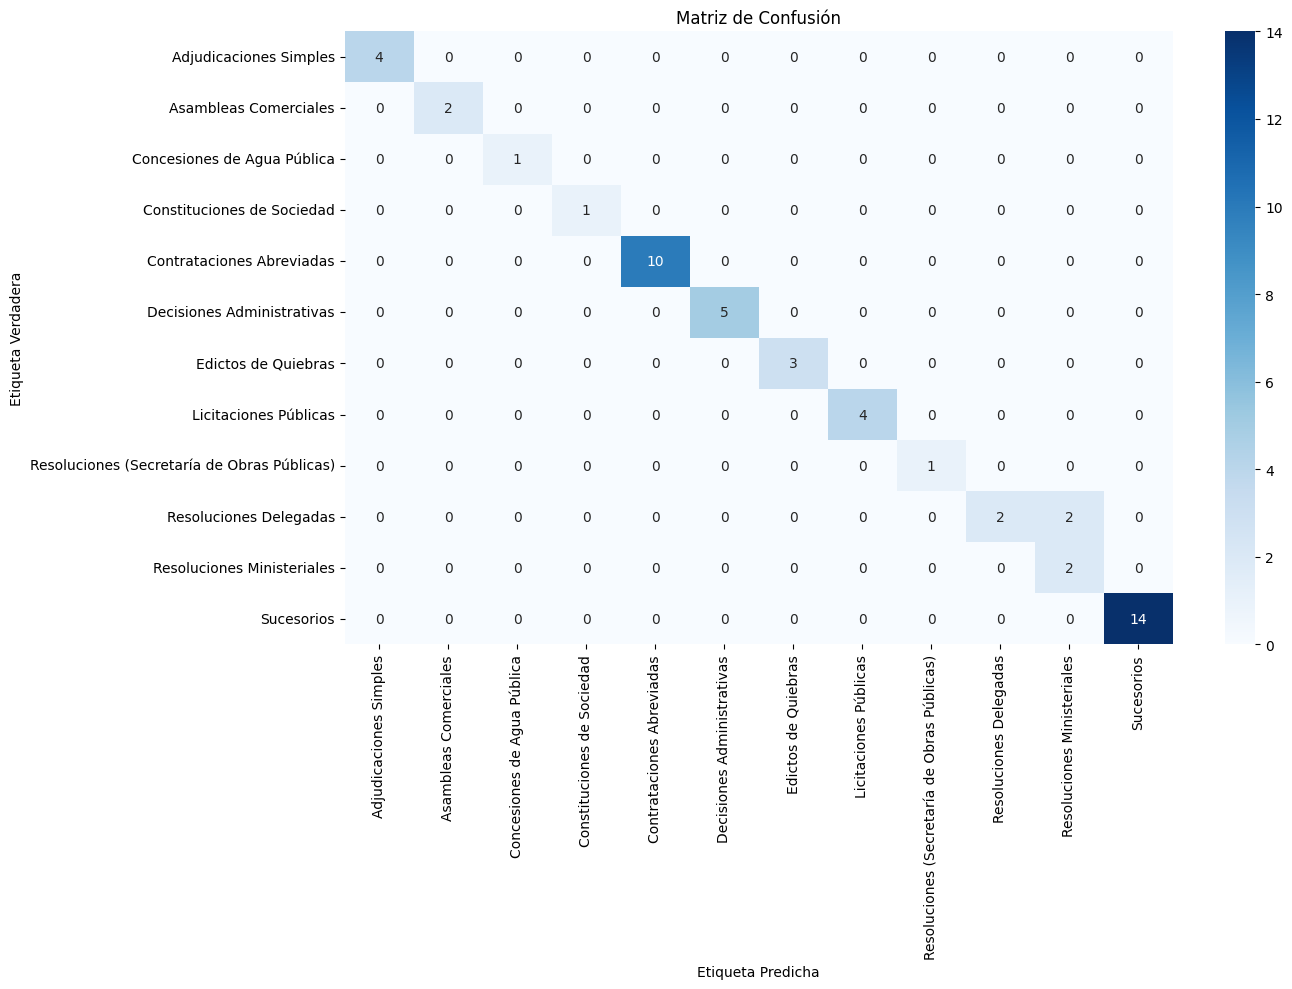

In [53]:
# Calcular la matriz de confusión
y_true = df_eval_filtrado["Etiqueta_Verdadera"]
y_pred = df_eval_filtrado["Etiqueta_Predicha"]
labels = sorted(y_true.unique())

cm = confusion_matrix(y_true, y_pred, labels=labels)

# Crear el heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.title("Matriz de Confusión")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [56]:
from sklearn.metrics import accuracy_score

# Calcular accuracy general
accuracy = accuracy_score(y_true, y_pred)
accuracy

0.9607843137254902

## Prediccion de documentos

In [5]:
#Crear embeddings con un modelo de Hugging Face
# Usamos un modelo multilingüe adecuado para textos legales
modelo = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

# Convertimos cada contenido a un vector (embedding)
corpus = df['Texto_Limpio'].tolist()
embeddings = modelo.encode(corpus, show_progress_bar=True)

# Convertimos a matriz numpy
embedding_matrix = np.array(embeddings)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/473 [00:00<?, ?it/s]

In [6]:
# Paso 4: Indexar embeddings con FAISS (búsqueda rápida por similitud)
dim = embedding_matrix.shape[1]
index = faiss.IndexFlatL2(dim)
index.add(embedding_matrix)

In [7]:
def buscar_respuesta(pregunta, top_k=5, mostrar=True):
    """
    Busca los documentos más relevantes para una pregunta usando embeddings semánticos.

    Args:
        pregunta (str): pregunta del usuario
        top_k (int): cantidad de documentos a mostrar
        mostrar (bool): si se desea imprimir resultados o no

    Returns:
        df_resultado (pd.DataFrame): sub-DataFrame con los documentos más similares
        lista_indices (List[int]): lista de índices del DataFrame original
    """
    pregunta_emb = modelo.encode([pregunta])
    D, I = index.search(np.array(pregunta_emb), top_k)

    indices = I[0].tolist()
    distancias = D[0]
    resultados = df.iloc[indices].copy()
    resultados["Distancia"] = distancias

    if mostrar:
        for i, (idx, dist) in enumerate(zip(indices, distancias)):
            print(f"\n🔎 Documento {i+1} (Distancia {dist:.2f})")
            print(f"OP_Numero: {df.iloc[idx]['OP_Numero']}")
            print(f"Contenido:\n{df.iloc[idx]['Texto_Limpio'][:2000]}...")

    return resultados, indices


In [10]:
# Paso 6: Probar el sistema
pregunta = "¿Qué documentos mencionan adjudicaciones?"
resultados = buscar_respuesta(pregunta)


🔎 Documento 1 (Distancia 9.82)
OP_Numero: 100112701
Contenido:
En los autos caratulados: "DAGUM, ANTONIO RUBEN POR SUCESORIO", EXP - 816359/23 del 
Juzgado de 1º Instancia en lo Civil y Comercial 2º Nominación, a cargo de la Dra. Sandra 
Marcela Cointte, Jueza, de trámite por ante esta Oficina Judicial de Gestión Asociada de 
Procesos Sucesorios, Secretaría del suscripto; se ordena la publicación de edictos durante 
(un) 1 día en el Boletín Oficial (art. 2340 del C.C.yC.N.) citando a todas las personas que se 
consideren con derechos a los bienes de la sucesión de Antonio Ruben Dagum, DNI Nº 
14.695.205, ya sea como herederos/herederas o acreedores/acreedoras para que dentro de 
los treinta días de la última publicación comparezcan a hacerlos valer, bajo apercibimiento 
de lo que hubiere lugar por ley.
Dr. Pablo Omar Sánchez Genovese, SECRETARIO OFIGA 
Factura de contado: 0011 - 00019454
Fechas de publicación: 04/04/2024
Importe: $ 2,310.00
OP N°: 100112701...

🔎 Documento 2 (Distanci

In [12]:
resultados[0]

,Boletin_N,Documento_N,Texto,OP_Numero,Texto_Limpio,Score_Leyes,Score_Decisiones Administrativas,Score_Resoluciones Delegadas,Score_Resoluciones Ministeriales,Score_Resoluciones (Secretaría de Obras Públicas),...,Score_Sucesorios,Score_Edictos de Quiebras,Score_Concursos Civiles o Preventivos,Score_Edictos Judiciales,Score_Constituciones de Sociedad,Score_Asambleas Comerciales,Score_Asambleas Civiles,Score_Avisos Generales,Score_Recaudación,Distancia
5840,21682.pdf,13,"En los autos caratulados: ""DAGUM, ANTONIO RUBE...",100112701,"En los autos caratulados: ""DAGUM, ANTONIO RUBE...",0.017678,0.014843,0.016869,0.007566,0.009047,...,0.679102,0.009020,0.054529,0.015616,0.009180,0.015151,0.012659,0.015616,0.017336,9.822275
13927,21767.pdf,44,"En los autos caratulados: ""MAISAREZ, JUAN POR ...",100116243,"En los autos caratulados: ""MAISAREZ, JUAN POR ...",0.021799,0.013589,0.020024,0.007381,0.009505,...,0.654096,0.010158,0.047638,0.021778,0.008816,0.017245,0.014034,0.019427,0.019617,9.899520
7318,21795.pdf,29,ADJUDICACIÓN SIMPLE Nº 167/2024\nDIRECCIÓN DE ...,100117554,ADJUDICACIÓN SIMPLE Nº 167/2024\nDIRECCIÓN DE ...,0.032141,0.023728,0.011217,0.005681,0.004365,...,0.012078,0.004352,0.011170,0.004669,0.004879,0.005353,0.004975,0.009245,0.009427,9.904629
4293,21852.pdf,53,"En los autos caratulados: ""YAZLLE, GUILLERMO J...",100120366,"En los autos caratulados: ""YAZLLE, GUILLERMO J...",0.024760,0.015769,0.019683,0.009047,0.008837,...,0.568506,0.010132,0.083404,0.020032,0.009763,0.020931,0.016064,0.030515,0.022065,9.905804
11728,21847.pdf,16,"En los autos caratulados: ""BARRIENTOS CUESTAS,...",100120166,"En los autos caratulados: ""BARRIENTOS CUESTAS,...",0.016336,0.012093,0.015512,0.006562,0.009831,...,0.669319,0.009092,0.054208,0.018322,0.007627,0.016368,0.011282,0.023195,0.025080,9.913588


In [13]:
resultados[1]

[5840, 13927, 7318, 4293, 11728]

In [32]:
df.loc[df['OP_Numero']=="100114953"]['Texto_Limpio'].values[0]

'SALTA, 13 de Junio de 2024\nRESOLUCIÓN N° 15-24\nDIRECCIÓN GRAL. DE RECURSOS ENERGÉTICOS Y MINEROS \nExpediente N° 0110328-111449/2024-0\nVISTO: la Ley de Regalías Mineras N° 8.229 y la Resolución N° 11/23 de la \nSecretaría de Minería y Energía de la Provincia y;\nCONSIDERANDO:\nQue la Ley N° 8.229 obliga a los responsables del pago de regalías mineras a \npresentar las declaraciones juradas de cada trimestre en la forma, modalidad y formularios \nque disponga la Autoridad de Aplicación;\nQue en el orden provincial, la Dirección General de Recursos Energéticos y \nMineros es actualmente Autoridad de Aplicación de la Ley N° 8.229, con competencia para \nejercer todas las funciones referentes a recaudación, fiscalización, determinación y control \nde las regalías mineras de la provincia de Salta, conforme lo establecido en el artículo 30° de \nla mencionada normativa y en el artículo 3o del Decreto N° 254/12;\nQue en el marco de las políticas públicas en materia de modernización que ll